## 线性回归 _lasso_RidgeCV_ElasticNetCV

In [1]:
# 导入必要的工具包
import numpy as np #用于数值计算
import pandas as pd #用于数据表处理，数据文件读写
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

import matplotlib.pyplot as plt #用于绘图：分析结果的可视化。
import seaborn as sns #用于绘图：分析结果的可视化。封装更好。
from IPython.display import display

#应该是设置浮点数的形式格式，小数点后三位
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#这一行是干嘛的？ 设置 matplotlib 让绘制的图形出现在 Notebook 里而不是新窗口
%matplotlib inline

In [2]:
Y_Standard = True
# 生成的结果文件名称
out_name = '%ssummit=0.1-fe-avg_online_dynamic-static-%s.csv'

path  = '../data/new/'
path_train = '../data/new/train=0.1/'
path_test = '../data/new/test/'
summit_path = '../data/summit/'

In [3]:
#读取训练数据: 
train = pd.read_csv(path_train + 'train=0.1-fe-avg_online_dynamic-static.csv')
train.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pay_price,pay_count,prediction_pay_price
0,2320186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2959017,1.0000,2.0000,3.0000,1.0000,2.0000,1.0000,0.0000,0.0000,2.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,242613,3.0000,0.0000,4.0000,5.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1416097,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,680469,1.0000,1.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
test = pd.read_csv(path_test + 'tap_fun_test-fe-avg_online_dynamic-static.csv')
test.head()

,user_id,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,...,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pay_price,pay_count
0,14933,1.0000,4.0000,4.0000,1.0000,2.0000,1.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,14934,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,14935,0.0000,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,14936,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,14937,0.0000,0.0000,2.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
# 从原始数据中分离输入特征x和输出y
target = 'prediction_pay_price'
id = 'user_id'
train_y = train[target].values
train_X = train.drop([target, id], axis = 1)

# test_id = test[id]
test_X = test.drop([id], axis = 1)

In [20]:
X_train_part, X_val_part, y_train_part, y_val_part = train_test_split(train_X, train_y, random_state=33, test_size=0.1)
print('train.shape=%s X_train_part.shape=%s X_test_part.shape=%s'
      %(train.shape, X_train_part.shape, X_val_part.shape))

train.shape=(228800, 69) X_train_part.shape=(205920, 67) X_test_part.shape=(22880, 67)


## 数据标准化

In [21]:
# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train_part = ss_X.fit_transform(X_train_part)
X_val_part= ss_X.transform(X_val_part)
test_X = ss_X.transform(test_X)

if Y_Standard:
    y_train_part = ss_y.fit_transform(y_train_part.reshape(-1, 1))
    y_val_part = ss_y.transform(y_val_part.reshape(-1, 1))

# 需要转换为一维数组 
y_train_part_1d = y_train_part.reshape(y_train_part.shape[0])
y_val_part_1d = y_val_part.reshape(y_val_part.shape[0])

In [8]:
# 标准化数据还原 
def inverse_StandardScaler(predict):
    if Y_Standard:
        predict = ss_y.inverse_transform(predict)
        print('predict = ', predict)
    return predict

#输出预测后的数据
def generate_summit(predict):
    testPredict = test.copy()
    testPredict[target] = predict
    testPredict = testPredict[[id,target]]
    testPredict[target] = testPredict[target].apply(lambda x: x if x > 0 else 0)
    return testPredict

# def move_up(predict):
#     # 预测值里面的最小值
#     pred_min = np.min(predict)
#     if pred_min < 0:
#     #     如果是负数，则整体上移，效果不好 
#         predict = predict - pred_min
#     print('pred_min=%s'%pred_min)
#     return predict

## 模型训练
### 1.正则化的线性回归（L1正则 --> Lasso）

In [33]:
%%time
#正则项系数
# alphas = [0.1, 10, 100, 1000, 10000, 10000]
alphas = [0.001, 0.01, 0.05, 0.079, 0.08, 0.081, 0.09, 0.1, 1]

# Lasso 模型实例
lasso = LassoCV(alphas=alphas)
#进行模型训练
lasso.fit(X_train_part, y_train_part_1d)

Wall time: 1.51 s


best alpha is: 0.079


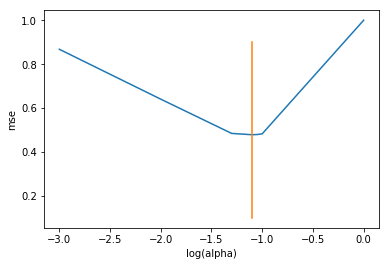

In [34]:
## 3.1 Lasso 模型评价
mses = np.mean(lasso.mse_path_, axis=1)

#plt.plot(np.log10(alphas), mses)
plt.plot(np.log10(lasso.alphas_), mses)
# plt.show()  #绘制在一张图上，显示异常，暂时分开 

plt.plot(np.log10(lasso.alpha_)*np.ones(3), [0.1, 0.5, 0.9])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
# plt.show() 
print ('best alpha is:', lasso.alpha_)
# best alpha is: 10.5

In [35]:
# 模型评估
lassoScoreTrain = lasso.score(X_train_part, y_train_part)
lassoScoreVal = lasso.score(X_val_part, y_val_part)
print('The score: Train=%s  Val=%s'% (lassoScoreTrain, lassoScoreVal)) 

lasso_predict_train = lasso.predict(X_train_part)
rmseTrain = mean_squared_error(y_train_part, lasso_predict_train) ** 0.5
lasso_predict_val = lasso.predict(X_val_part)
rmseVal = mean_squared_error(y_val_part, lasso_predict_val) ** 0.5
print('The RMSE: Train=%s  Val=%s' % (rmseTrain, rmseVal))

# The score: Train=0.6026498641616385  Val=0.8354317552131078
# The RMSE: Train=0.6303571494306712  Val=0.5921995943739873

The score: Train=0.6146004238247404  Val=0.8329797688967685
The RMSE: Train=0.6208055864562267  Val=0.5965950245520162


In [28]:
#对测试数据进行预测
lasso_y_predict_test = lasso.predict(test_X)
print('lasso_y_predict_test = ', lasso_y_predict_test)

# 标准化数据还原 
lasso_y_predict_test = inverse_StandardScaler(lasso_y_predict_test)
# lasso_y_predict_test =  [0.4556051 0.4556051 0.4556051 ... 0.4556051 0.4556051 0.4556051]

lasso_y_predict_test =  [-0.01958588 -0.01958588 -0.01958588 ... -0.01958588 -0.01958588
 -0.01958588]
predict =  [0.32593278 0.32593278 0.32593278 ... 0.32593278 0.32593278 0.32593278]


In [29]:
testPredict = generate_summit(lasso_y_predict_test)
#输出预测后的数据
testPredict.to_csv(out_name %(summit_path, 'lasso'), index=False)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.3259
1,14934,0.3259
2,14935,0.3259
3,14936,0.3259
4,14937,0.3259


## 2 正则化的线性回归（L2正则 --> 岭回归）

In [45]:
%%time
#正则项的参数
# alphas = [0.01, 0.1, 1, 10, 100, 10000]
alphas = [0.1, 10000, 440000, 445000,450000,455000, 460000, 500000, 1000000, 10000000]

#创建岭回归模块实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
#进行模型训练
ridge.fit(X_train_part, y_train_part)

Wall time: 4.82 s


best alpha is: 450000.0


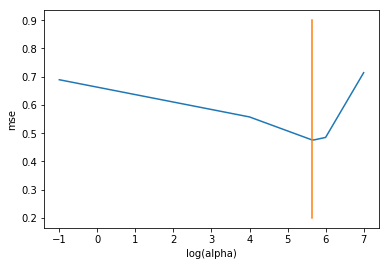

In [46]:
### 2.1 岭回归模型评价
mse_mean = np.mean(ridge.cv_values_, axis=0)

#正则项参数取对数， mse_mean.reshape() 干什么的？拉平
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas), 1))
# 在最佳参数位置绘制竖线：注意第二个参数值要和 Y 坐标轴匹配
plt.plot(np.log10(reg.alpha_)*np.ones(3), [.2, .7, .9])
# plt.show() #绘制在一张图上，显示异常，暂时分开 

plt.xlabel('log(alpha)')
plt.ylabel('mse')

print('best alpha is:', reg.alpha_)

In [47]:
# 模型评估
ridgeScoreTrain = ridge.score(X_train_part, y_train_part)
ridgeScoreVal = ridge.score(X_val_part, y_val_part)
print('The score: Train=%s  Val=%s'% (ridgeScoreTrain, ridgeScoreVal)) 

ridge_predict_train = ridge.predict(X_train_part)
rmseTrain = mean_squared_error(y_train_part, ridge_predict_train) ** 0.5
ridge_predict_val = ridge.predict(X_val_part)
rmseVal = mean_squared_error(y_val_part, ridge_predict_val) ** 0.5
print('The RMSE: Train=%s  Val=%s' % (rmseTrain, rmseVal))

#The score: Train=0.5949662293458398  Val=0.7221624627853553
# The RMSE: Train=0.6364226352465477  Val=0.7694679714355298

The score: Train=0.5949662293458398  Val=0.7221624627853553
The RMSE: Train=0.6364226352465477  Val=0.7694679714355298


In [48]:
#对测试数据进行预测
ridge_y_predict_test = ridge.predict(test_X)
print('ridge_y_predict_test = ', ridge_y_predict_test)

# 标准化数据还原 
ridge_y_predict_test = inverse_StandardScaler(ridge_y_predict_test)

ridge_y_predict_test =  [[-0.02574998]
 [-0.02916905]
 [-0.02968864]
 ...
 [-0.04554132]
 [-0.02793688]
 [-0.02774284]]
predict =  [[-0.06468358]
 [-0.28134823]
 [-0.31427403]
 ...
 [-1.31885044]
 [-0.20326628]
 [-0.19096989]]


In [56]:
# ridge_y_predict_test = move_up(ridge_y_predict_test)
#输出预测后的数据
testPredict = generate_summit(ridge_y_predict_test)
#输出预测后的数据
testPredict.to_csv(out_name %(summit_path, 'RidgeCV'), index=False)
testPredict.head()

pred_min=0.0


,user_id,prediction_pay_price
0,14933,84.3206
1,14934,84.1040
2,14935,84.0710
3,14936,85.1522
4,14937,84.0346


### 3. 正则化的线性回归 ElasticNetCV 

In [63]:
%%time
# l1_ratio = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
# Lasso 模型实例
elastic_net = ElasticNetCV(l1_ratio=l1_ratio, eps=0.001, n_jobs=-1)

#进行模型训练
y_train_part_1d = y_train_part.reshape(y_train_part.shape[0])
elastic_net.fit(X_train_part, y_train_part_1d)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Wall time: 14.7 s


best alpha is:0.06755166083756958  l1_ratio_:1.0


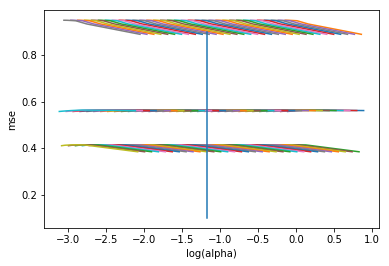

In [65]:
## 3.1 Lasso 模型评价
mses = np.mean(elastic_net.mse_path_, axis=1)

#plt.plot(np.log10(alphas), mses)
plt.plot(np.log10(elastic_net.alphas_), mses)
# plt.show()  #绘制在一张图上，显示异常，暂时分开 

plt.plot(np.log10(elastic_net.alpha_)*np.ones(3), [0.1, 0.5, .9])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
# plt.show() 

print ('best alpha is:%s  l1_ratio_:%s' % (elastic_net.alpha_, elastic_net.l1_ratio_))
# best alpha is:1.853019181787895  l1_ratio_:0.1

In [66]:
# 模型评估
elastic_netScoreTrain = elastic_net.score(X_train_part, y_train_part)
elastic_netScoreVal = elastic_net.score(X_val_part, y_val_part)
print('The score of ElasticNet: Train=%s  Val=%s'% (elastic_netScoreTrain, elastic_netScoreVal)) 

elastic_net_predict_train = elastic_net.predict(X_train_part)
rmseTrain = mean_squared_error(y_train_part, elastic_net_predict_train) ** 0.5
elastic_net_predict_val = elastic_net.predict(X_val_part)
rmseVal = mean_squared_error(y_val_part, elastic_net_predict_val) ** 0.5
print('The RMSE: Train=%s  Val=%s' % (rmseTrain, rmseVal))

# The score of ElasticNet: Train=0.5933701157431497  Val=0.6918598273465699
# The RMSE: Train=40.40916662890711  Val=51.351069750253906

The score of ElasticNet: Train=0.6252723535546627  Val=0.7812344063379026
The RMSE: Train=0.6121500195583901  Val=0.682785982774603


In [67]:
#对测试数据进行预测
elastic_net_predict_test = elastic_net.predict(test_X)
print('elastic_net_predict_test = ', elastic_net_predict_test)

# 标准化数据还原 
elastic_net_predict_test = inverse_StandardScaler(elastic_net_predict_test)

elastic_net_predict_test =  [-0.02091785 -0.0221065  -0.0221065  ... -0.02134954 -0.0221065
 -0.0221065 ]
predict =  [0.24152607 0.16620206 0.16620206 ... 0.21417011 0.16620206 0.16620206]


In [68]:
testPredict = generate_summit(elastic_net_predict_test)
#输出预测后的数据
testPredict.to_csv(out_name %(summit_path, 'ElasticNetCV'), index=False)
testPredict.head()

,user_id,prediction_pay_price
0,14933,0.2415
1,14934,0.1662
2,14935,0.1662
3,14936,0.1662
4,14937,0.1662
